#  import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read the data

In [2]:
df = pd.read_csv('E:/data from kaggle to apply data analysis and vsualization methods/netflix1.csv  on 05 Mar/netflix1.csv')
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
df.shape

(8790, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('show_id' , axis = 1 , inplace = True)

In [10]:
df.head()

,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


#### hint : we have to change type of 'date_added' to datatime object validity

In [13]:
df['date_added'] = pd.to_datetime(df['date_added'])

#### hint : we have to modify values in 'duration' column to one values and change data type
####          because it contain a mix of minite values and season values.  

In [14]:
reset_index_of_season = df[df['duration'].str.contains('season')].index.to_list()
new_df = df.drop(reset_index_of_season).reset_index(drop=True)

In [16]:
new_df['duration'] = new_df['duration'].str.split(' ').str.get(0).astype(int)

## Data Exploration

In [18]:
new_df.shape

(8790, 9)

In [19]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      8790 non-null   object        
 3   country       8790 non-null   object        
 4   date_added    8790 non-null   datetime64[ns]
 5   release_year  8790 non-null   int64         
 6   rating        8790 non-null   object        
 7   duration      8790 non-null   int32         
 8   listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int32(1), int64(1), object(6)
memory usage: 583.8+ KB


In [20]:
new_df.select_dtypes('int').describe()

,release_year,duration
count,8790.000000,8790.000000
mean,2014.183163,69.934471
std,8.825466,50.794433
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.500000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [22]:
new_df.select_dtypes('object').describe()

,type,title,director,country,rating,listed_in
count,8790,8790,8790,8790,8790,8790
unique,2,8787,4528,86,14,513
top,Movie,9-Feb,Not Given,United States,TV-MA,"Dramas, International Movies"
freq,6126,2,2588,3240,3205,362


In [26]:
new_df['country'].unique()

array(['United States', 'France', 'Brazil', 'United Kingdom', 'India',
       'Germany', 'Pakistan', 'Not Given', 'China', 'South Africa',
       'Japan', 'Nigeria', 'Spain', 'Philippines', 'Australia',
       'Argentina', 'Canada', 'Hong Kong', 'Italy', 'New Zealand',
       'Egypt', 'Colombia', 'Mexico', 'Belgium', 'Switzerland', 'Taiwan',
       'Bulgaria', 'Poland', 'South Korea', 'Saudi Arabia', 'Thailand',
       'Indonesia', 'Kuwait', 'Malaysia', 'Vietnam', 'Lebanon', 'Romania',
       'Syria', 'United Arab Emirates', 'Sweden', 'Mauritius', 'Austria',
       'Turkey', 'Czech Republic', 'Cameroon', 'Netherlands', 'Ireland',
       'Russia', 'Kenya', 'Chile', 'Uruguay', 'Bangladesh', 'Portugal',
       'Hungary', 'Norway', 'Singapore', 'Iceland', 'Serbia', 'Namibia',
       'Peru', 'Mozambique', 'Ghana', 'Zimbabwe', 'Israel', 'Finland',
       'Denmark', 'Paraguay', 'Cambodia', 'Georgia', 'Soviet Union',
       'Greece', 'West Germany', 'Iran', 'Venezuela', 'Slovenia',
       'Gua

In [29]:
df['country'].nunique()

86

In [28]:
df['country'].value_counts()

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 86, dtype: int64

In [27]:
df['type'].value_counts()

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

## Data visualization

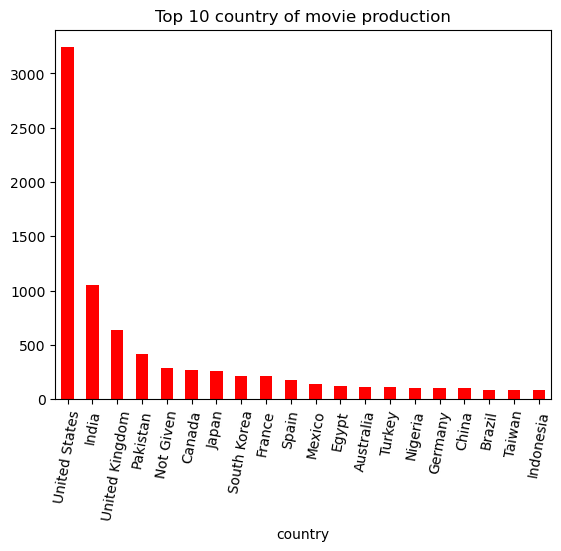

In [32]:
new_df['country'].value_counts().head(20).plot(kind = 'bar' , title = 'Top 10 country of movie production' ,
                                                        rot = 80 , color = 'red')
plt.show()

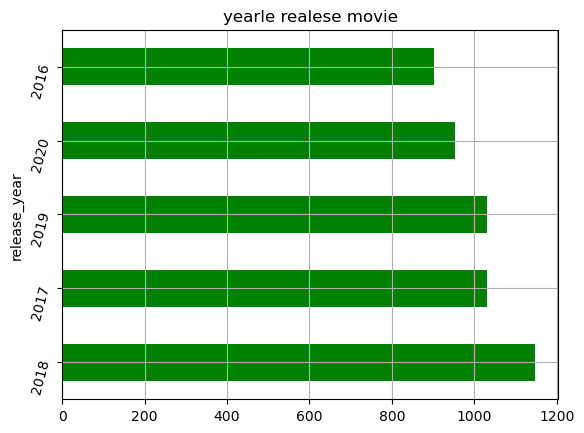

In [37]:
new_df['release_year'].value_counts().head().plot(kind = 'barh' , title = 'yearle realese movie' , rot = 75 , 
                                          color = 'green' , grid = True)
plt.show()

In [42]:
df['director'].value_counts()

director
Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: count, Length: 4528, dtype: int64

In [43]:
df['director'].unique()

array(['Kirsten Johnson', 'Julien Leclercq', 'Mike Flanagan', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

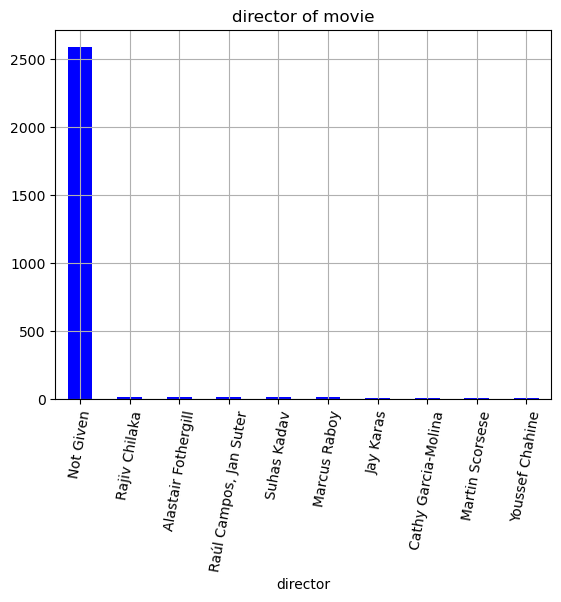

In [48]:
df['director'].value_counts().head(10).plot.bar(title = 'director of movie' , rot = 80 , color = 'blue' ,
                                                grid = True )
plt.show()

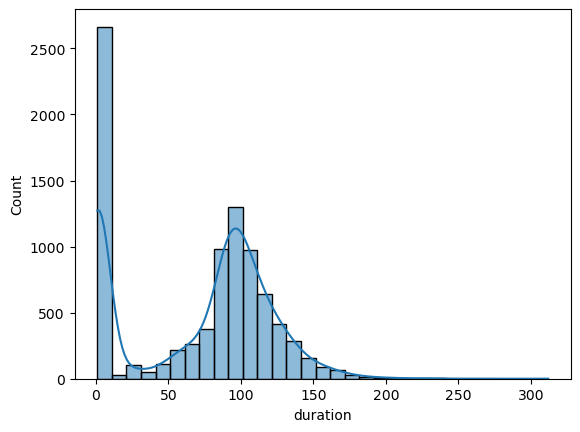

In [49]:
sns.histplot(data = new_df , x = 'duration' , kde = True)
plt.show()

In [50]:
new_df['duration'].skew()

-0.19273747154107437

In [51]:
x = new_df['listed_in'].str.split(', ' , expand = True)

In [52]:
x.isna().sum()

0       0
1    2012
2    5064
dtype: int64

In [53]:
x_count = x.stack().value_counts()
x_count

International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      573
Crime TV Shows                   469
Kids' TV                         448
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     174
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

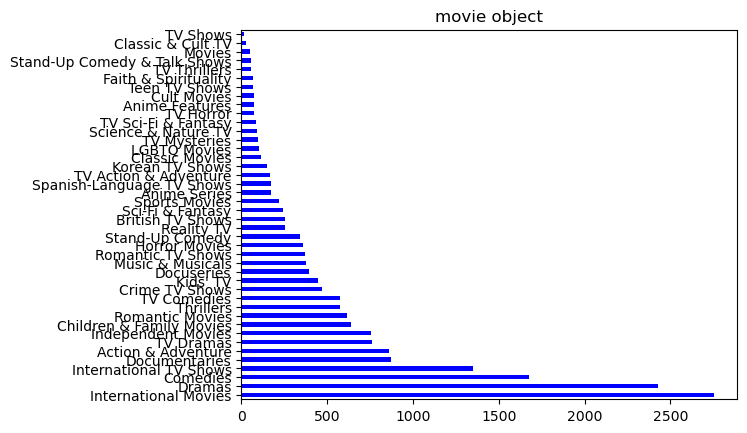

In [57]:
x_count.plot.barh(title = 'movie object' , color = 'blue')
plt.show()